In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN

from scipy.signal import find_peaks

import matplotlib
from pylab import rcParams
#%matplotlib widget, camera ready submission problem
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams['savefig.dpi'] = 300
rcParams.update({'figure.autolayout': True})

def readfile(filename):
    types = {'frequency': float,'power': float}
    df = pd.read_csv(filename, skiprows=0, header=None, delim_whitespace=False, delimiter=' ')
    df.columns = ['frequency', 'power']
    df.dropna(inplace=True)
    #print(df.describe())
    return df

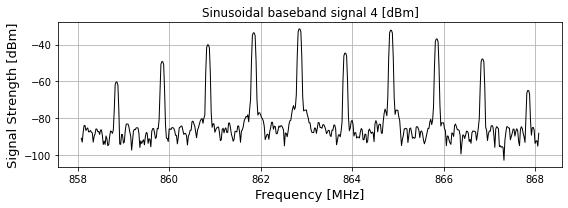

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 3
fig, ax1 = plt.subplots(1)


path = './logs/signal_strength/4/'
filename = 'data0'
df = readfile(path + filename + ".csv")


ax1.plot(df['frequency']/1e6, df['power'], color='black', linewidth=1)
ax1.set_xlabel('Frequency [MHz]', fontsize=13)
ax1.set_ylabel('Signal Strength [dBm]', fontsize=13)
# ax1.set_xlim([855.7, 856.5])
ax1.set_title("Sinusoidal baseband signal 4 [dBm]")
ax1.grid()

plt.tight_layout()

In [5]:
# Read data
B_P = [4, -6, -16, -26, -36]
Index = [[0,1], [1,2], [1,2], [1,2], [1,2], [1,2], [1,2], [1,2]]
Power = []
for idx in range(5):
    path = './logs/' + str(B_P[idx])
    filename = '/data0'
    df = readfile(path + filename + ".csv")
    
    x = df['power'].to_numpy()
    peaks, _ = find_peaks(x)
    a = sorted(x[peaks])[::-1]
    Power.append((a[Index[idx][0]] + a[Index[idx][1]])/2)
 
# Read file for baseband signal -46 when peak can not be detected, manually find out the peak
path = './logs/' + str(-46)
filename = '/data0'
df = readfile(path + filename + ".csv")

x = df['power'].to_numpy()
peaks, _ = find_peaks(x)
a = sorted(x[peaks])[::-1]

DF = df.iloc[peaks,:]

print(DF[(DF.frequency<864000000) & (DF.frequency>862000000)])
print(DF[(DF.frequency<866000000) & (DF.frequency>864000000)])

B_P.append(-46)
Power.append((DF.power[244] + DF.power[346])/2)

# Compute conversion loss
Loss = []

for idx in range(len(B_P)):
    Loss.append(B_P[idx] - Power[idx])

       frequency    power
202  862120000.0 -87.7225
206  862200000.0 -87.8243
209  862260000.0 -85.7821
214  862360000.0 -85.2800
217  862420000.0 -86.0491
220  862480000.0 -85.6240
223  862540000.0 -86.1413
227  862620000.0 -85.7536
230  862680000.0 -85.7593
236  862800000.0 -86.3637
244  862960000.0 -75.7334
250  863080000.0 -83.3408
257  863220000.0 -85.6275
262  863320000.0 -82.7878
268  863440000.0 -82.8220
273  863540000.0 -76.9702
278  863640000.0 -79.0022
281  863700000.0 -71.3358
288  863840000.0 -68.4016
290  863880000.0 -64.7030
295  863980000.0 -26.7783
       frequency    power
302  864120000.0 -70.5641
308  864240000.0 -70.7360
314  864360000.0 -82.0492
317  864420000.0 -77.2999
320  864480000.0 -80.2922
329  864660000.0 -81.4514
339  864860000.0 -83.1609
346  865000000.0 -77.3952
353  865140000.0 -84.7062
357  865220000.0 -88.5536
361  865300000.0 -81.8409
371  865500000.0 -83.3519
376  865600000.0 -86.9543
381  865700000.0 -85.2435
384  865760000.0 -86.7475
389  8658600

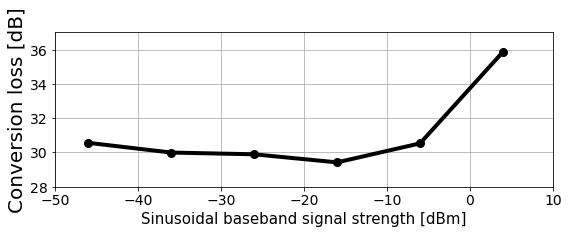

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 3
fig, ax1 = plt.subplots(1)

ax1.plot(B_P, Loss, color='black', marker='o', markersize=8, linewidth=4)
ax1.set_xlabel('Sinusoidal baseband signal strength [dBm]', fontsize=15)
ax1.set_ylabel('Conversion loss [dB]', fontsize=20)
ax1.tick_params(labelsize=14)
ax1.grid()

ax1.set_ylim([28, 37])
ax1.set_xlim(-50, 10)
plt.tight_layout()
plt.savefig('./conversionloss.pdf')

In [13]:
# Read data
Freq = [100, 250, 500, 1000, 2500, 5000, 10000]
# Manually calibrate peak index for the case when tag signal is weak
Index = [[1,2], [1,2], [1,2], [1,2], [1,2], [1,2], [3,4], [1,2], [3,4], [1,6]]
Power = []
for idx in range(7):
    path = './logs/freq/i' + str(idx+1)
    filename = '/data0'
    df = readfile(path + filename + ".csv")
    
    x = df['power'].to_numpy()
    peaks, _ = find_peaks(x)
    a = sorted(x[peaks])[::-1]
#     Power.append((a[Index[idx][0]] + a[Index[idx][0]])/2)
    Power.append((a[1] + a[2])/2)

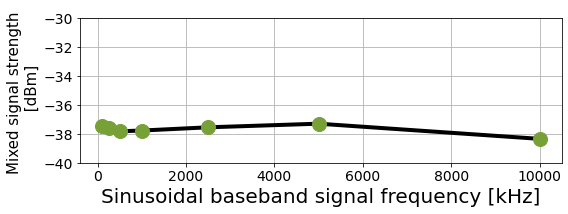

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 3
fig, ax1 = plt.subplots(1)

ax1.plot(Freq, Power, color='black', marker='o', markersize=14, linewidth=4, markerfacecolor='#77A136', markeredgecolor='#77A136')
ax1.set_xlabel('Sinusoidal baseband signal frequency [kHz]', fontsize=20)
ax1.set_ylabel("Mixed signal strength \n [dBm]", fontsize=15)
ax1.tick_params(labelsize=14)
ax1.set_ylim([-40, -30])
ax1.grid()

plt.tight_layout()
plt.savefig('./mixer_freq.pdf')

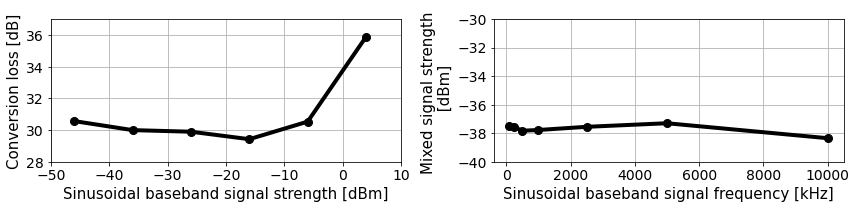

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 3
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(B_P, Loss, color='black', marker='o', markersize=8, linewidth=4)
ax1.set_xlabel('Sinusoidal baseband signal strength [dBm]', fontsize=15)
ax1.set_ylabel('Conversion loss [dB]', fontsize=15)
ax1.tick_params(labelsize=14)
ax1.grid()
ax1.set_ylim([28, 37])
ax1.set_xlim(-50, 10)

ax2.plot(Freq, Power, color='black', marker='o', markersize=8, linewidth=4)
ax2.set_xlabel('Sinusoidal baseband signal frequency [kHz]', fontsize=15)
ax2.set_ylabel("Mixed signal strength \n [dBm]", fontsize=15)
ax2.tick_params(labelsize=14)
ax2.set_ylim([-40, -30])
ax2.grid()

plt.tight_layout()
plt.savefig('./mixer.pdf')